Need to do a few things: 
    1. Create gridworld environment
    2. Describe a policy evaluation/improvement method to come up with a solution
    3. Visualize this solution


    a. Some set of k iterations

In [2]:
from enum import Enum
import pandas as pd
import random
from matplotlib import pyplot as plt
import numpy as np


In [4]:
Actions = Enum("Actions", ['UP','DOWN','RIGHT','LEFT'])


In [6]:
def step(state, action):
    pass


1

In [ ]:

def step(state, action):
    
    next_state = 

    if is_terminal(state):
        reward = 0
        return state, reward

    return next_state, reward

In [45]:
SZ = 4
ACTIONS = [
    np.array([0,1]), # up
    np.array([0, -1]), # down
    np.array([-1, 0]), # left
    np.array([1,0]) # right
]
ACTION_PROBABILITY = 0.25 # moving in any of the 4 directions has equal probability
GAMMA = 1.0 # arbitrary value, not sure what they used in 
CONVERGENCE_THRESHOLD = 1e-4 # should be sufficiently small
# ITERATIONS_TO_CAPTURE = [0,1,2,3,10]
ITERATIONS_TO_CAPTURE = [0,3,10,50,150]

def is_terminal(state):
    x, y = state
    return (x == 0 and y == 0) or (x == SZ-1 and y == SZ-1)

def out_of_bounds(x,y):
    return x < 0 or x >= SZ or y < 0 or y >= SZ

def step(state, action): # take a step according to policy
    if is_terminal(state):
        return state, 0 # reward = 0 for terminal states

    current_cords_as_array = np.array(state)
    next_state = current_cords_as_array + action
    x, y = next_state.tolist()
    
    if out_of_bounds(x, y):
        next_state = state
    
    return next_state, -1 # non-terminal states have reward -1

def run_policy_evaluation():
    captured_values = []# for plotting

    iteration = 0
    new_state_values = np.zeros((SZ,SZ))

    while True:
        state_values = new_state_values.copy()
        
        old_state_values = state_values.copy()

        for i in range(SZ):
            for j in range(SZ):
                # i, j is a state
                this_state = [i,j]
                value = 0
                for action in ACTIONS: # this could depend on s
                    (next_i, next_j), reward = step(this_state, action) # how we get dependence on s
                    value += ACTION_PROBABILITY * (reward + GAMMA * old_state_values[next_i,next_j])
                    # compute the value at this point 
                new_state_values[i,j] = value 

        largest_delta = abs(old_state_values - new_state_values).max()
        print("k: ", iteration, ", largest_delta: ", largest_delta)

        if (iteration) in ITERATIONS_TO_CAPTURE: # off-by-one since we've done ONE update at this point
            captured_values.append(np.array(new_state_values))

        if largest_delta < CONVERGENCE_THRESHOLD:
            break

        iteration += 1

    return new_state_values, iteration, captured_values


In [46]:
end_state_values, end_iteration, captured_values = run_policy_evaluation()

k:  0 , largest_delta:  1.0
k:  1 , largest_delta:  1.0
k:  2 , largest_delta:  1.0
k:  3 , largest_delta:  0.96875
k:  4 , largest_delta:  0.9375
k:  5 , largest_delta:  0.89453125
k:  6 , largest_delta:  0.8544921875
k:  7 , largest_delta:  0.81103515625
k:  8 , largest_delta:  0.770751953125
k:  9 , largest_delta:  0.730255126953125
k:  10 , largest_delta:  0.6925201416015625
k:  11 , largest_delta:  0.6557655334472656
k:  12 , largest_delta:  0.6213254928588867
k:  13 , largest_delta:  0.5882596969604492
k:  14 , largest_delta:  0.5571491718292236
k:  15 , largest_delta:  0.527485579252243
k:  16 , largest_delta:  0.49950262904167175
k:  17 , largest_delta:  0.4729122780263424
k:  18 , largest_delta:  0.44778872188180685
k:  19 , largest_delta:  0.4239568174816668
k:  20 , largest_delta:  0.40141887217760086
k:  21 , largest_delta:  0.38005873272777535
k:  22 , largest_delta:  0.3598478467174573
k:  23 , largest_delta:  0.3407020762497268
k:  24 , largest_delta:  0.3225811673137286

In [38]:
from matplotlib.table import Table
import seaborn as sns

In [47]:
def plot(captured_values):

    for ( idx, k) in enumerate(ITERATIONS_TO_CAPTURE): # = [0,1,2,3]
        fig, ax = plt.subplots()
        plt.gcf().text(-0.03, 0.5, f"k = {k}", fontsize=14)

        ax.set_axis_off()
        # k + 1 is actual value
        print(idx)
        current_value = np.round(captured_values[idx], decimals=2)
        min_value = np.min(current_value)
        max_value = np.max(current_value)
        sns.heatmap(current_value, vmin=min_value, vmax=max_value)
        table = Table(ax)

        nrows, ncols = current_value.shape
        width, height = 1.0 / ncols, 1.0 / nrows

        # Add cells
        for (i, j), val in np.ndenumerate(current_value):
            table.add_cell(i, j, width, height, text=val,
                        loc='center', facecolor='white')

            # Row and column labels...
        for i in range(len(current_value)):
            table.add_cell(i, -1, width, height, text=i+1, loc='right',
                        edgecolor='none', facecolor='none')
            table.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                        edgecolor='none', facecolor='none')
        
        ax.add_table(table)
    


0
1
2
3
4


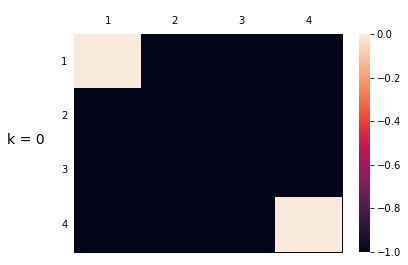

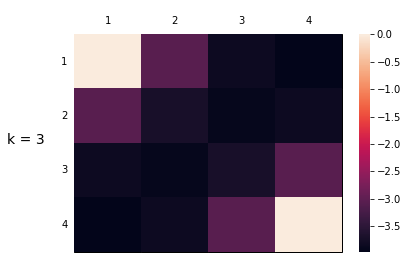

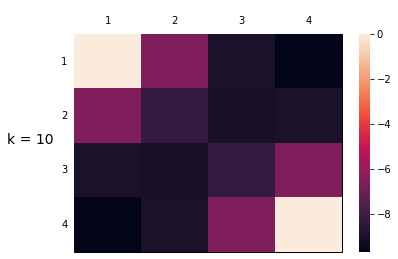

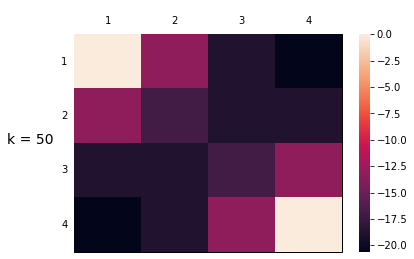

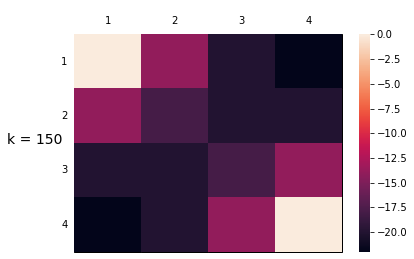

In [48]:
plot(captured_values)